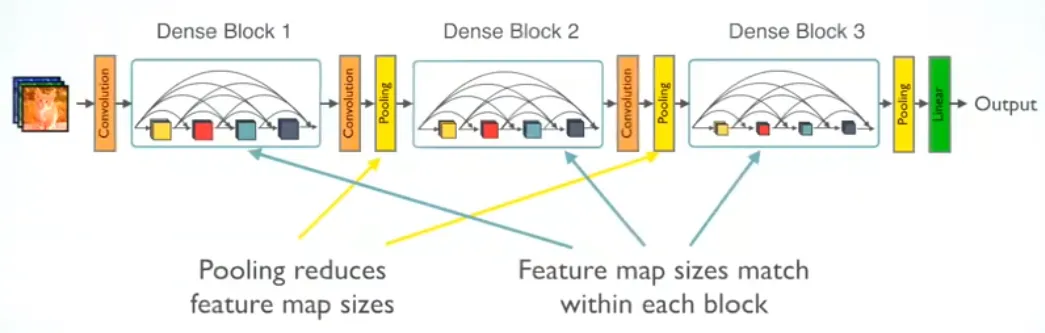

上图为一个由3个dense block稠密块构成的DenseNet。稠密块之间的连接称为Transition layer过渡层，过渡层由BN+卷积层+池化层构成。论文中主要由BN+1×1卷积+2×2池化构成。连接层除了连接dense block外，主要作用有二：

1. 通过1×1卷积改变通道维；
2. 池化层down sampling + 使feature maps的尺寸减半

### 稠密块

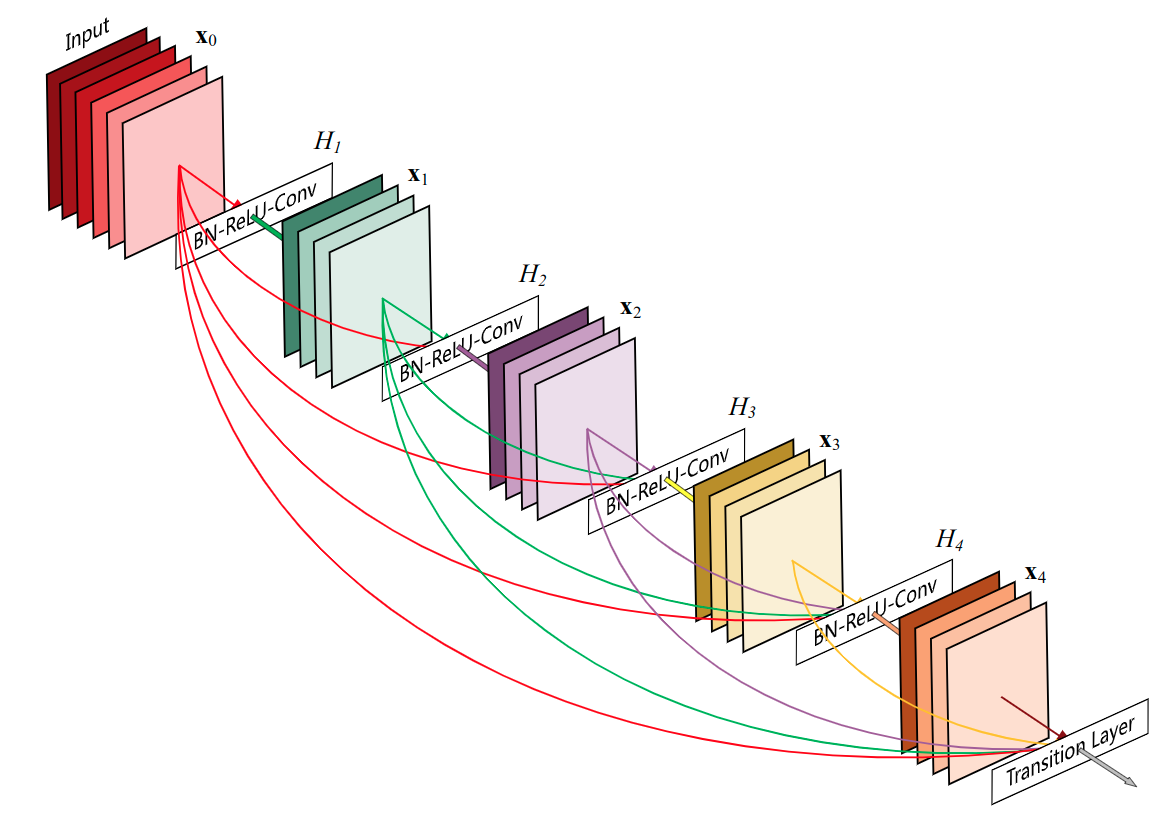

图1：5层的dense block，增长率k = 4,每层都接收之前所有层的feature maps作为输入

dense block稠密块内部的layer通过复合函数H来连接，复合函数H由BN + ReLU + Conv串联构成。layer包含特征图的层数由输入和增长率k是(超参数)决定，上图k = 4。那些红色、绿色、紫色的块是指输入层和抽象出的特征。

作者团队基于上述思路提出了一种架构：**为了确保最大的信息流，将所有层直接互相连接，为了保持前馈的特性，每一层都从先前的所有层中获得附加的输入并将自身的特征图传给所有后续的层**

5层的dense block，增长率k = 4,每层都接收之前所有层的feature maps作为输入

和ResNet不同，其在特征传入layer之前需经过相加求和，得到组合特征后传递给下一层；在图示的架构中，组合特征的方式是通过【串联】而不是【求和】。在作者的架构中，假设总共有_L层，第l层具有l个输入(之前的所有层都会是其输入)；而第l _层的输出也会作为之后所有层的输入。这样L层网络的连接总数将有:

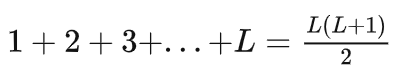

正是由于层于层之间密集的连接模式，这种方式称为稠密卷积网络——DenseNet。 归纳一下，论文中提到的DenseNets的优点：

1. 与传统CNNs相比参数更少(尽管看上去相反)，因为其不需要学习冗余特征
2. 改善了整个网络中的information flow和梯度，使得训练更为容易
3. 密集连接具有正则化效果，能降低训练集size较小的任务的过拟合现象

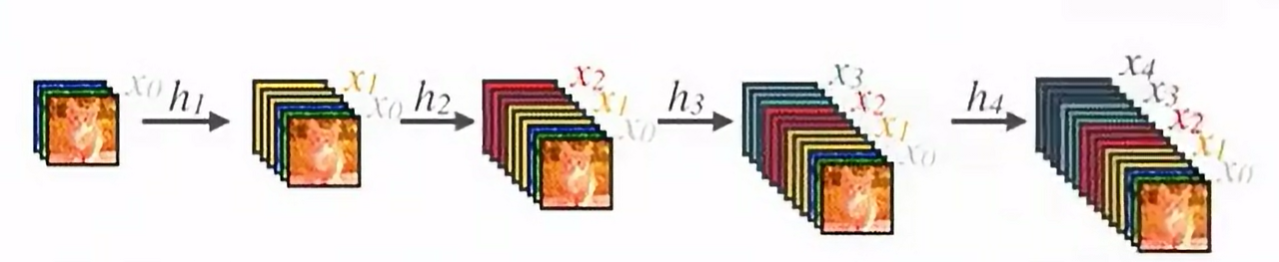

**增长率Growth rate——k**

在一个Dense Block内，每一个layer产生的特征图数量通常由输入和超参数k共同决定，超参数k称为增长率.增长率k决定了每一个复合函数输出的特征图数量为k,则得出第l层具有 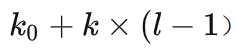
 个输入特征图,k0为上一层输入。 DenseNet与现有网络体系结构之间的一个重要区别是DenseNet可以具有非常狭窄的层，例如k =12。较小的增长率即可取得较好的学习效果，因为在dense block中每一层都可以学习和访问之前所有层的特征图，即可以方便地学到“集体知识”。在稠密块中，特征图可以视为网络的全局状态，每层都将自己产生的k个特征图贡献到此状态中，写入后的全局状态可以在网络的任意位置访问。

在DenseNet的实现里，H有两种版本：

* BN + RuLU + 3×3卷积
* BN + ReLU + 1×1卷积 →输出→ BN + RuLU + 3×3卷积

1. BN + RuLU + 3×3卷积，主要作用为特征提取
2. BN + ReLU + 1×1卷积 →输出→ BN + RuLU + 3×3卷积 主要作用除了特征提取外，还**通过1×1卷积改变通道维控制整体维度**，尤其是dense block内靠后的layer。在第1种的基础上增加了BN + ReLU + 1×1卷积的操作，增加的这层操作，也被称为**瓶颈层Bottleneck layers.**，采用此种方式的DenseNet版本被称为**DenseNet-B**。尽管，可以通过超参数k来控制dense block的总体层数，但有时叠加起来导致特征图的通道数目仍然很大，**故瓶颈层存在的主要目的就是降维，提高计算效率。**
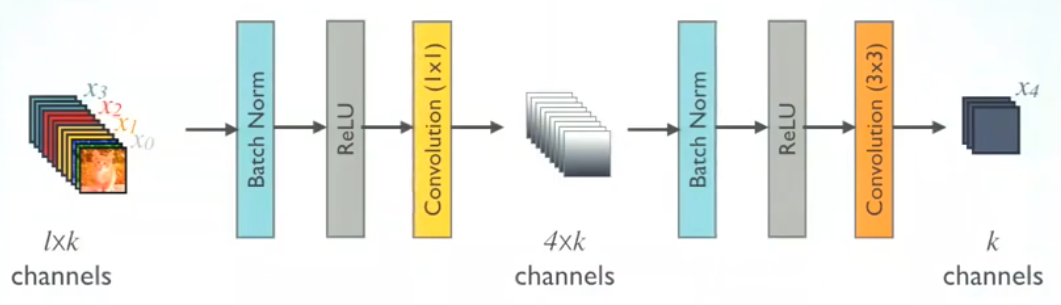

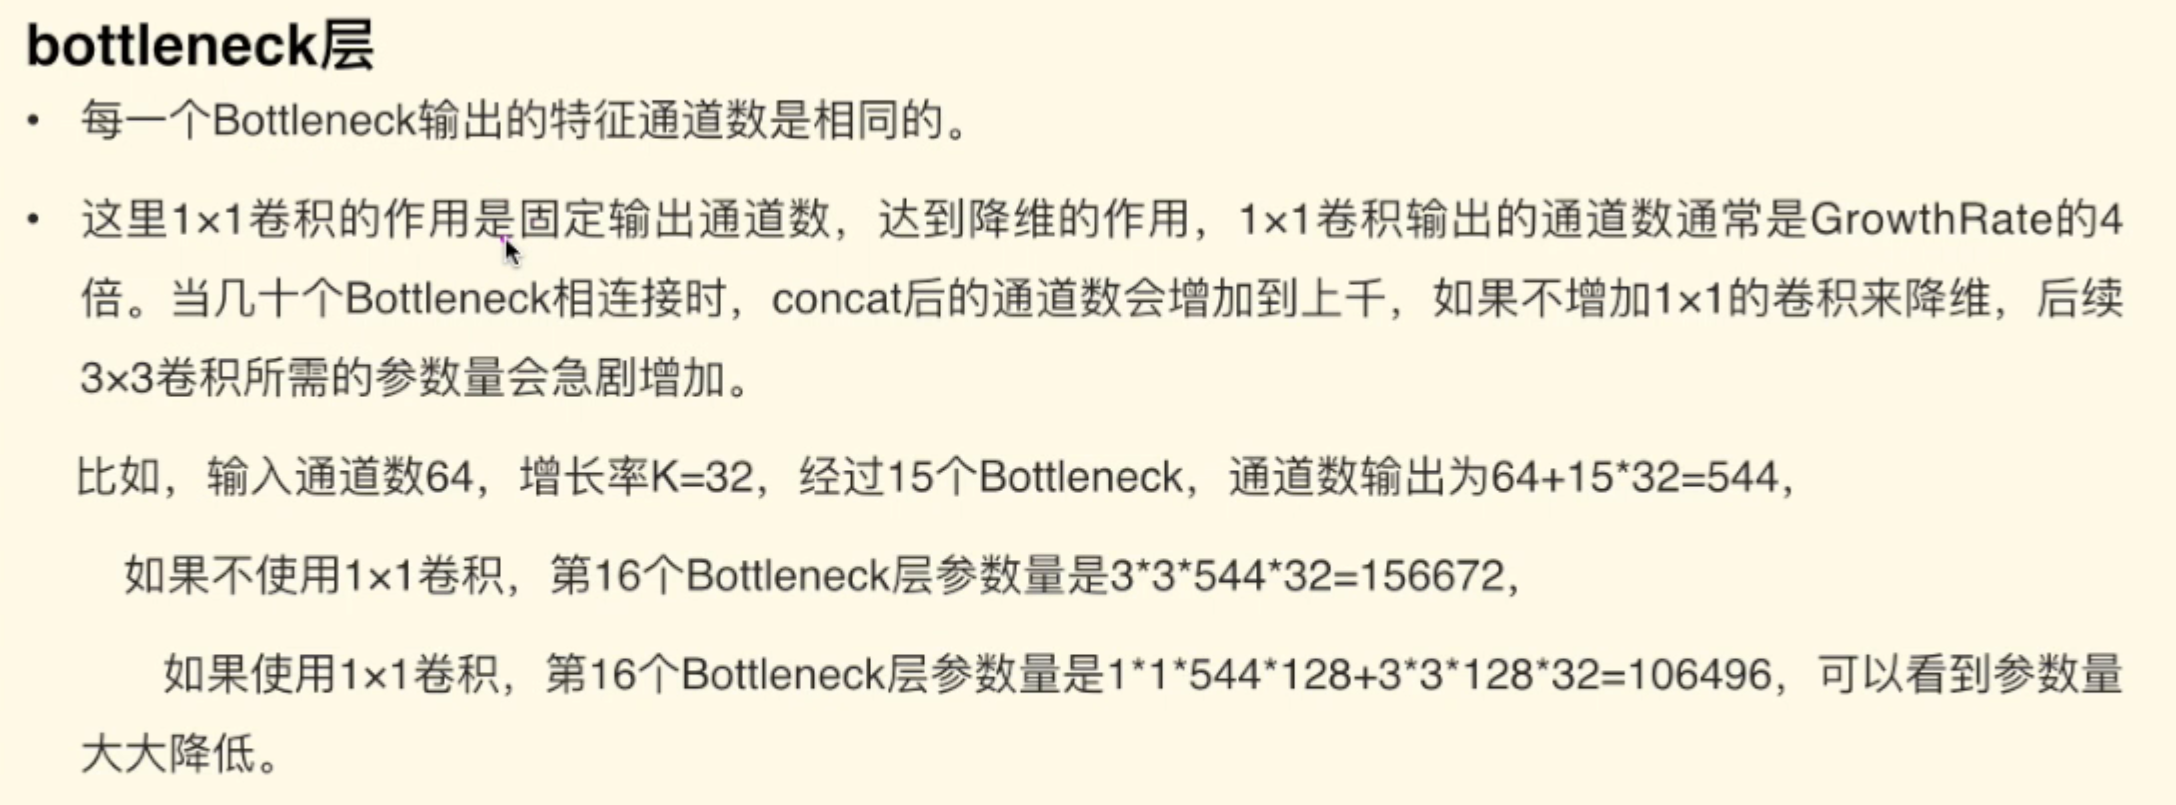

### DenseNets结构

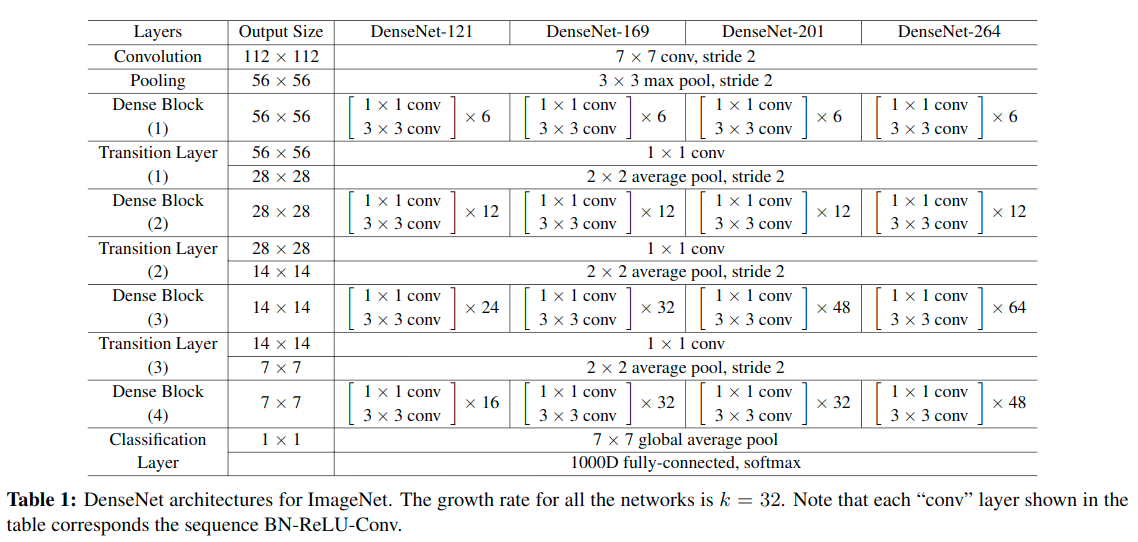

1. 以DenseNet-121为例，看下其网络构成： 1.DenseNet-121由121层权重层组成(其中4个Dense block，共计2×(6+12+24+16) = 116层权重，加上初始输入的1卷积层+3过渡层+最后输出的全连接层，共计121层)； 

 2. 训练时采用了DenseNet-BC结构，压缩因子0.5，增长率k = 32; 
 
 3. 初始卷积层有2k个filter，经过7×7卷积将224×224的输入图片缩减至112×112；Denseblock块由layer堆叠而成，layer的尺寸都相同：1×1+3×3的两层conv（每层conv = BN+ReLU+Conv）；Denseblock间由过渡层构成，过渡层通过2×2 stride2使特征图尺寸缩小一半。最后经过全局平均池化 + 全连接层的1000路softmax得到输出

### 过渡层Transition layer

符合函数H和增长率k控制的是Dense block稠密块内部的事情，而过渡层则用于稠密块之间的连接。论文中的过渡层由BN + conv(1×1) + average pool(2×2 stride2)组成。过渡层保留了传统卷积神经网络中的池化层，且减半池化可以控制feature maps的尺寸。

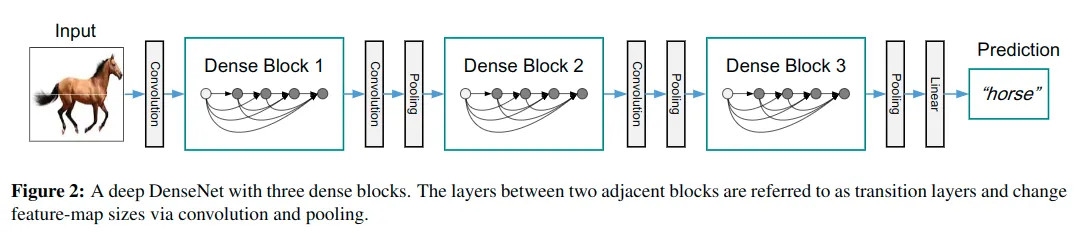

压缩

为了进一步提高模型的紧凑性，我们可以在dense block块之间的瓶颈层减少特征图数量(维度)。 其中**0 <θ≤1称为压缩因子**。当θ= 1时，跨过过渡层后特征图数量保持不变。当θ<1时，网络称为DenseNet-C；当瓶颈层和过渡层都采用θ<1时，**模型称为DenseNet-BC。论文实验中给定的θ = 0.5,即通道维压缩一半。**

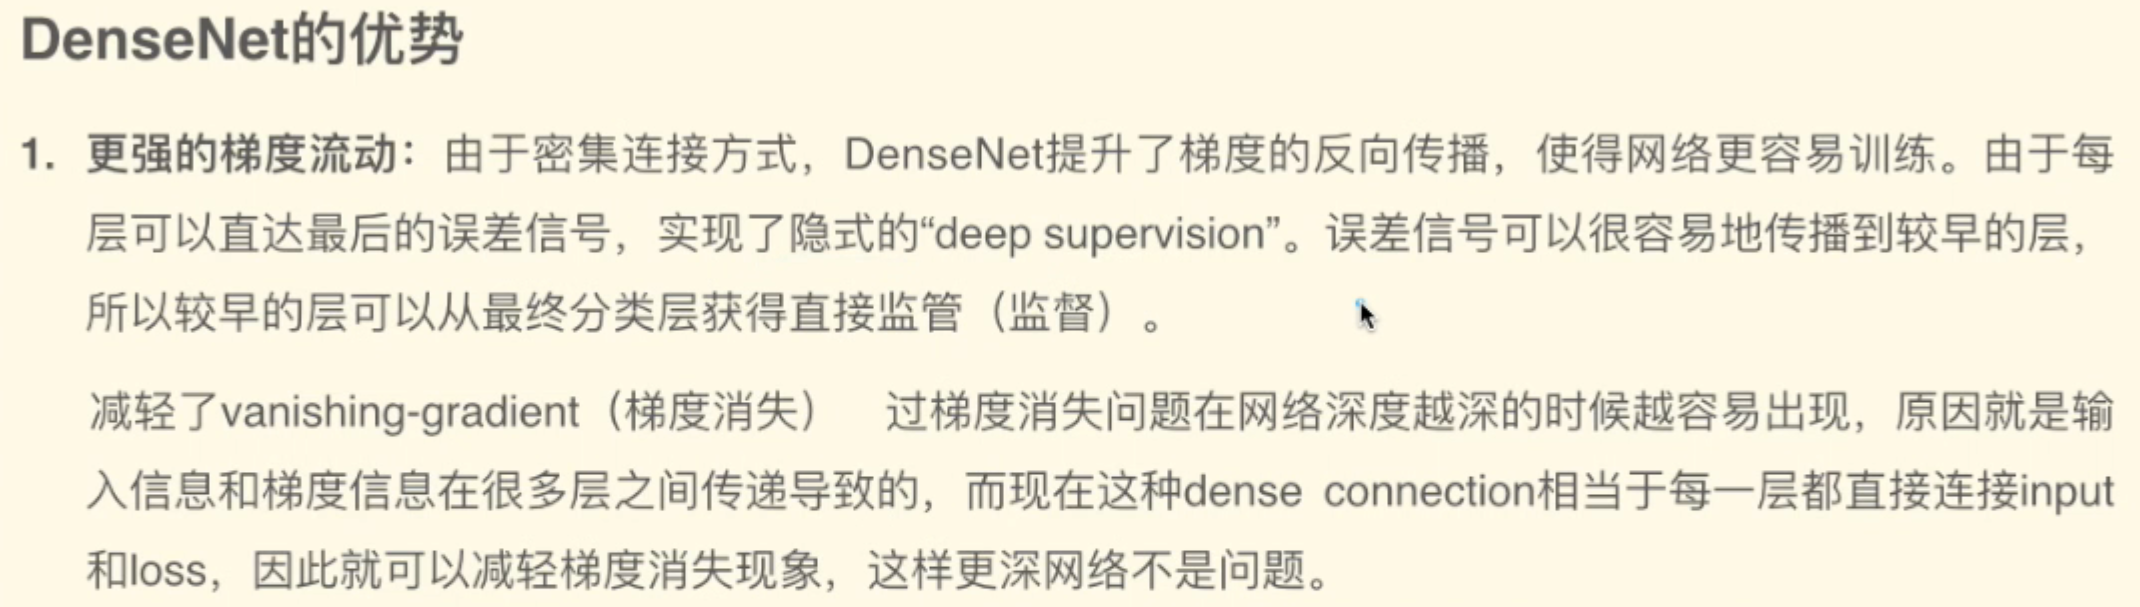

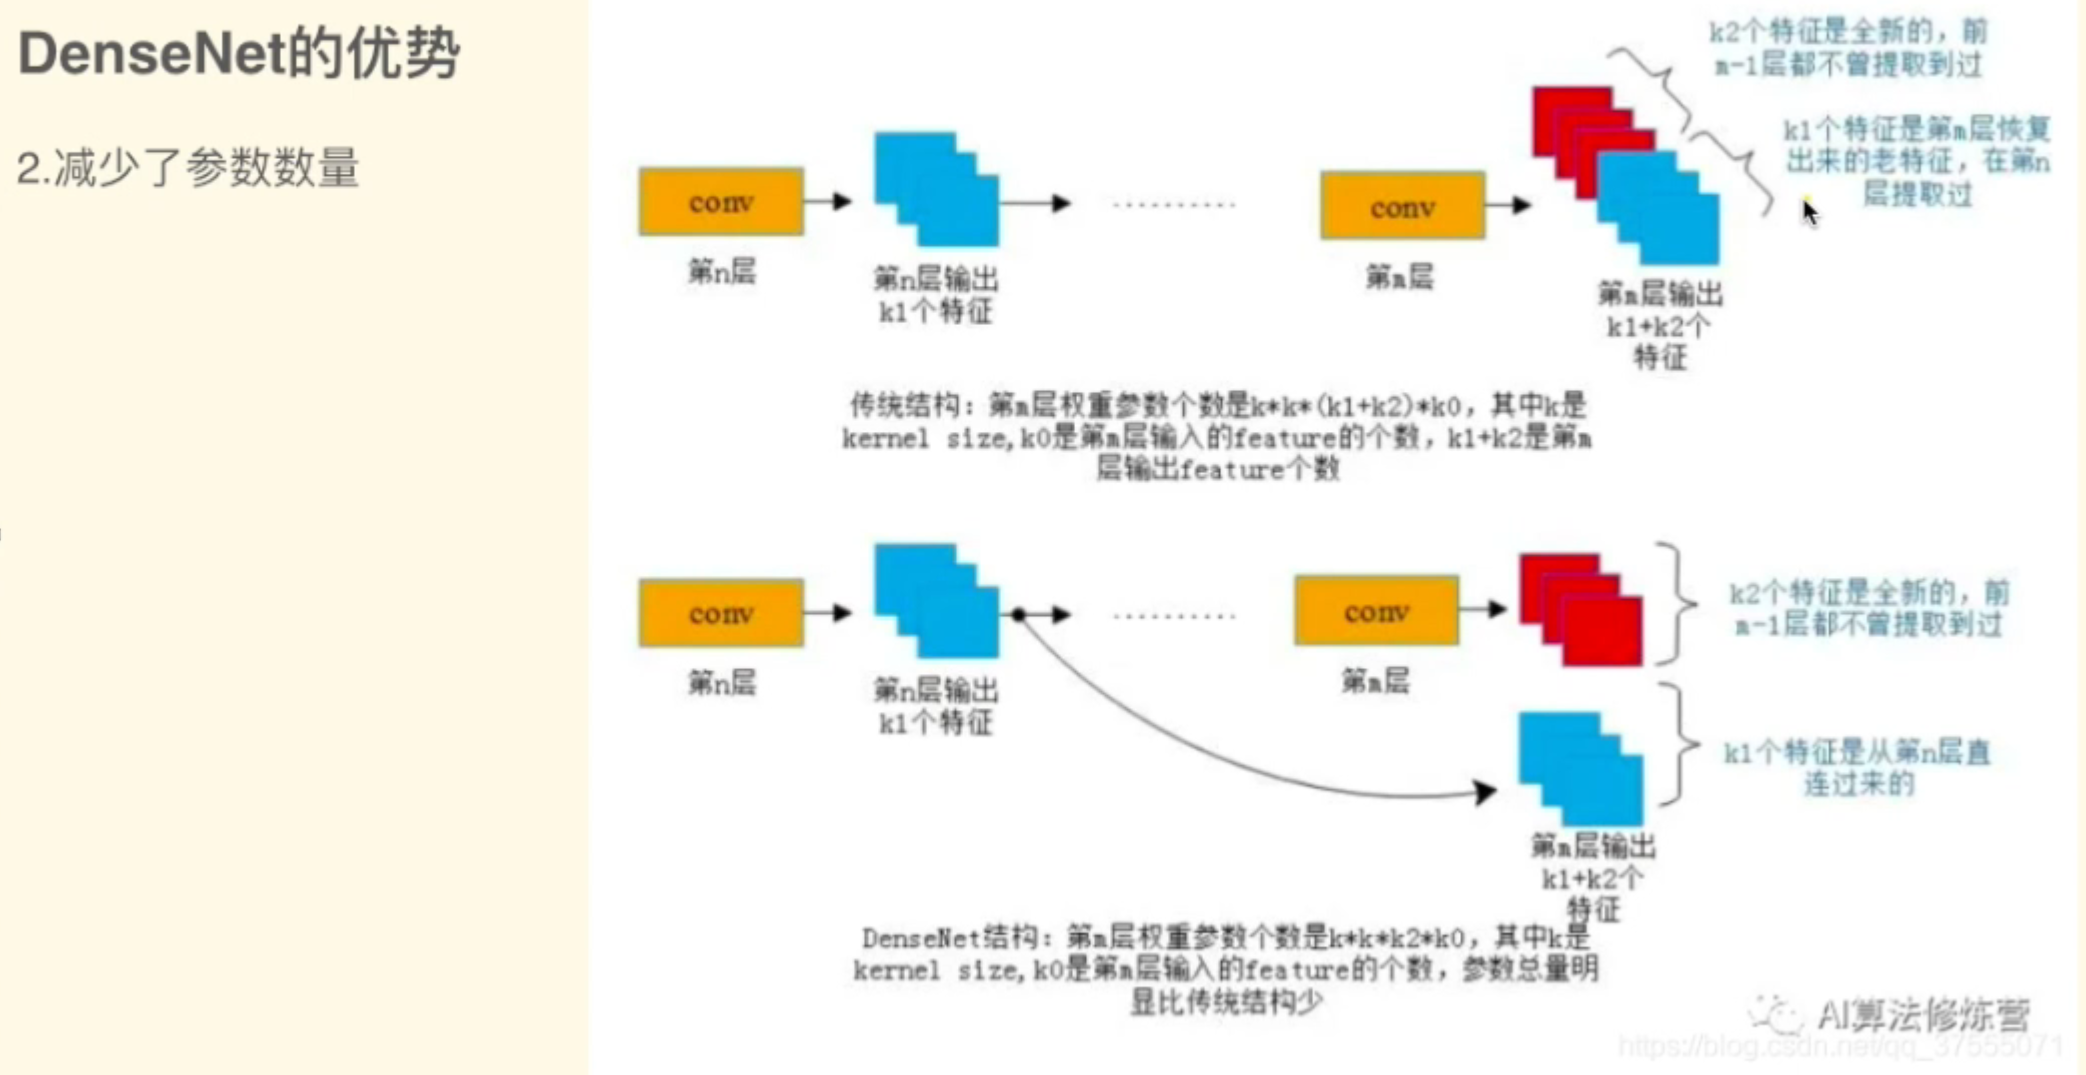

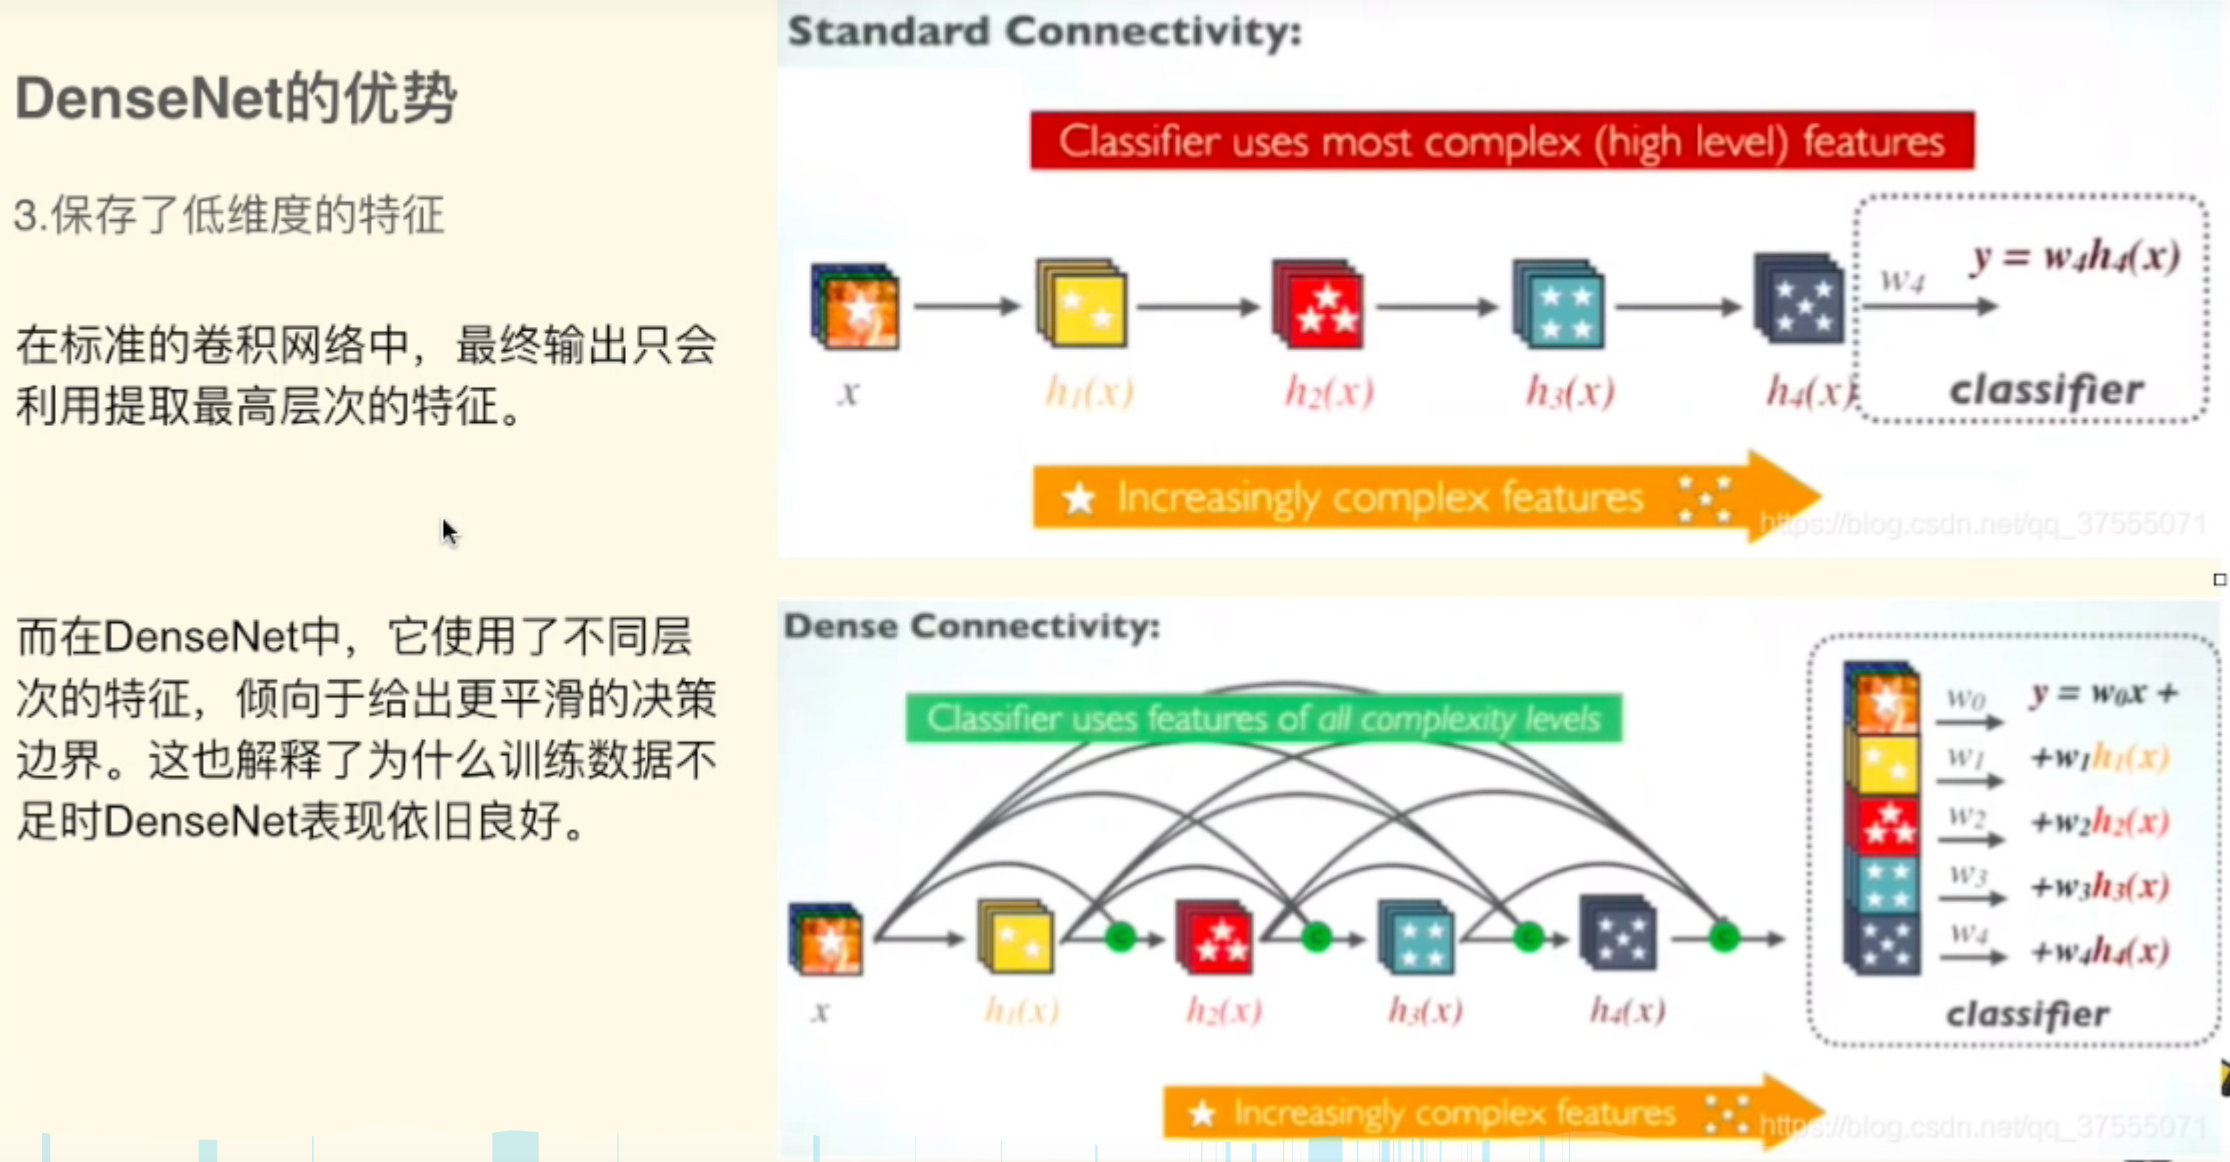